#Homework 3
#COMS 6998 - Practical Deep Learning Systems Performance
#In Wai Cheong (ic2518)

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from tensorflow.keras import initializers
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import time

## Question 1

1. Write the weight update equations for the five adaptive learning rate methods. Explain each term
clearly. What are the hyperparameters in each policy ? Explain how AdaDelta and Adam are different
from RMSProp

## Solution:

AdaGrad: $$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{G_{t} + \epsilon}} \odot g_{t}$$

$\theta$ is the parameter. $\eta$ is the learning rate. $\epsilon$ is a smoothing term that prevents division by $0$. $\odot$ is the matrix-vector product. $g_t$ is the gradient at time step $t$. $G_t$ is a diagonal matrix where each diagonal element $i$, $i$ is the sum of squares of the gradients with respect to $\theta$ up to time step $t$.

RMSProp: $$\begin{align} 
\begin{split} 
E[g^2]_t &= 0.9 E[g^2]_{t-1} + 0.1 g^2_t \\ 
\theta_{t+1} &= \theta_{t} - \dfrac{\eta}{\sqrt{E[g^2]_t + \epsilon}} g_{t} 
\end{split} 
\end{align}$$

RMSProp+Nesterov: $$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} (\beta_1 \hat{m}_t + \dfrac{(1 - \beta_1) g_t}{1 - \beta^t_1})$$

$\gamma$ is the momentum decay term. $\beta_1$ is the decay rate.

AdaDelta: $$\begin{align} 
\begin{split} 
\Delta \theta_t &= - \dfrac{RMS[\Delta \theta]_{t-1}}{RMS[g]_{t}} g_{t} \\ 
\theta_{t+1} &= \theta_t + \Delta \theta_t 
\end{split} 
\end{align}$$

RMS is the root mean squared error criterion.

Adam: $$\theta_{t+1} = \theta_{t} - \dfrac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$

$m_t$ and $v_t$ are estimates of the first moment (the mean) and the second moment (the uncentered variance) of the gradients respectively.

2. Train the neural network using all the five methods with L2-regularization for 200 epochs each and plot
the training loss vs number of epochs. Which method performs best (lowest training loss) ?

In [ ]:
from keras.datasets import cifar10

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#Preprocessing
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255.0
X_test /= 255.0

print(X_train.shape,
      y_train.shape,
      X_test.shape,
      y_test.shape)

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
#Model

model = Sequential()
model.add(Flatten())
model.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='HeNormal'))
model.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='HeNormal'))
model.add(Dense(10, activation='softmax'))

#Adagrad
tf.keras.optimizers.Adagrad(
learning_rate=0.001, initial_accumulator_value=0.1, epsilon=1e-07,
name='Adagrad')

#RMSProp
tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop")

#RMSProp + Nesterov
tf.keras.optimizers.Nadam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")

#AdaDelta
tf.keras.optimizers.Adadelta(
    learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta")

#Adam
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",)

In [ ]:
#Adagrad

##Compiling
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Fit model
tic = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#RMSProp

##Compiling
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

# Fit model
tic = time.time()
history2 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#Nadam

##Compiling
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# Fit model
tic = time.time()
history3 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#Adadelta

##Compiling
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

# Fit model
tic = time.time()
history4 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#Adam

##Compiling
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fit model
tic = time.time()
history5 = model.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

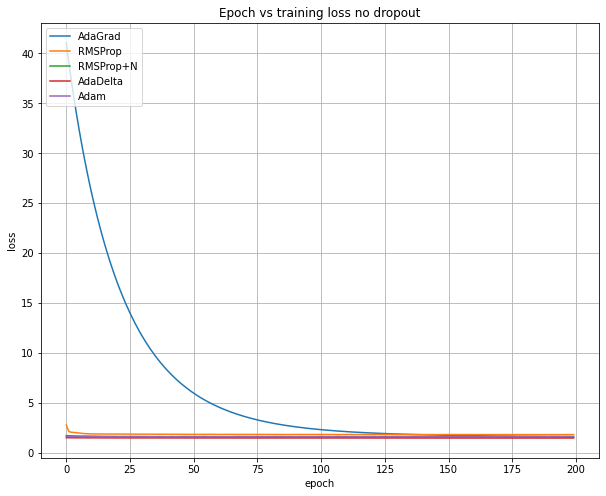

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='AdaGrad')
plt.plot(history2.history['loss'],label='RMSProp')
plt.plot(history3.history['loss'],label='RMSProp+N')
plt.plot(history4.history['loss'],label='AdaDelta')
plt.plot(history5.history['loss'],label='Adam')
plt.title('Epoch vs training loss no dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

3.  Add dropout (probability 0.2 for input layer and 0.5 for hidden layers) and train the neural networkagain using all the five methods for 200 epochs.  Compare the training loss with that in part 2.  Whichmethod performs the best ?  For the five methods, compare their training time (to finish 200 epochswith dropout) to the training time in part 2 (to finish 200 epochs without dropout).

In [ ]:
#Model
model2 = Sequential()
model2.add(Flatten())
model2.add(Dropout(0.2))
model2.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='HeNormal'))
model2.add(Dropout(0.5))
model2.add(Dense(1000,activation='relu',kernel_regularizer='l2',kernel_initializer='HeNormal'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

In [ ]:
#Adagrad

##Compiling
model2.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Fit model
tic = time.time()
history = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#RMSProp

##Compiling
model2.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])

# Fit model
tic = time.time()
history2 = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#Nadam

##Compiling
model2.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

# Fit model
tic = time.time()
history3 = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#Adadelta

##Compiling
model2.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])

# Fit model
tic = time.time()
history4 = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

In [ ]:
#Adam

##Compiling
model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fit model
tic = time.time()
history5 = model2.fit(X_train, y_train, batch_size=128, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=2)
toc = time.time()
print('Training Time:',toc-tic,'seconds')

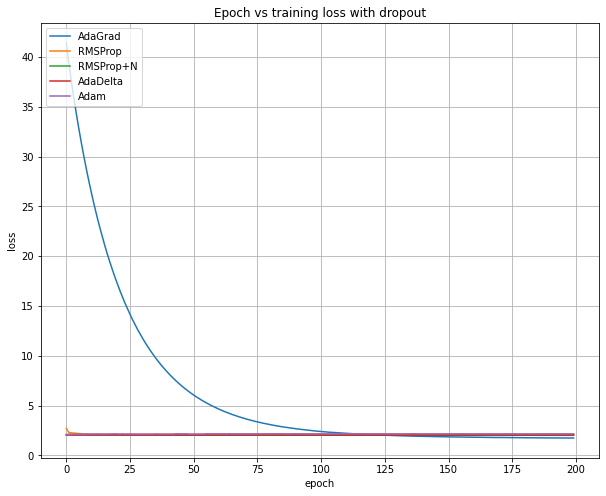

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='AdaGrad')
plt.plot(history2.history['loss'],label='RMSProp')
plt.plot(history3.history['loss'],label='RMSProp+N')
plt.plot(history4.history['loss'],label='AdaDelta')
plt.plot(history5.history['loss'],label='Adam')
plt.title('Epoch vs training loss with dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

4.  Compare test accuracy of trained model for all the five methods from part 2 and part 3.  Note that tocalculate test accuracy of model trained using dropout you need to appropriately scale the weights (bythe dropout probability). 

## Solution

Test accuracy for non-dropout: <br>
Adagrad: 0.4995 <br>
RMSProp: 0.3113 <br>
RMSProp+N: 0.4676 <br>
AdaDelta: 0.4861 <br>
Adam: 0.4528 <br>

Test accuracy for dropout: <br>
Adagrad: 0.4809 <br>
RMSProp: 0.2648 <br>
RMSProp+N: 0.3096 <br>
AdaDelta: 0.3138 <br>
Adam: 0.2251

The test accuracy for non-dropout is better.


## Question 3

1.  Calculate the number of parameters in Alexnet.  You will have to show calculations for each layer andthen sum it to obtain the total number of parameters in Alexnet.  When calculating you will need toaccount for all the filters (size, strides, padding) at each layer.  Look at Sec.  3.5 and Figure 2 in Alexnetpaper (see reference).  Points will only be given when explicit calculations are shown for each layer. 

## Solution:
Parameters = (size of kernels^2 * # of channels in input image * number of kernels) + number of kernels <br>

Output of ConvLayer = (input - size of kernels + 2*padding)/stride + 1
Output of MaxPool = (input - pool size)/stride + 1

Output = $\frac{227 -  11 + 2(0)}{4} + 1 = 55$ <br>
CONV1: $(11)^2(3)(96)+96 = 34944$ parameters; size: 55 x 55 x 96 <br>

Output = $\frac{55 - 3}{2}+1=27$ <br>
POOL1: $0$ parameters; size: 27 x 27 x 96 <br>

Output = $\frac{27 -  5 + 2(2)}{1} + 1 = 27$ <br>
CONV2: $(5)^2(96)(256)+256=614656$ parameters; size: 27 x 27 x 256 <br>

Output = $\frac{27 - 3}{2}+1=13$ <br>
POOL2: $0$ parameters; size: 13 x 13 x 256 <br>

Output = $\frac{13 -  3 + 2(1)}{1} + 1 = 13$ <br>
CONV3: $(3)^2(256)(384)+384=885120$ parameters; size: 13 x 13 x 384 <br>

Output = $\frac{13 -  3 + 2(1)}{1} + 1 = 13$ <br>
CONV4: $(3)^2(384)(384)+384=1327488$ parameters; size: 13 x 13 x 384 <br>

Output = $\frac{13 -  3 + 2(1)}{1} + 1 = 13$ <br>
CONV5: $(3)^2(384)(256)+256=884992$ parameters; size: 13 x 13 x 256 <br>

Output = $\frac{13 - 3}{2}+1=6$ <br>
POOL5: $0$ parameters; size: 6 x 6 x 256 <br>

FC: $(1)^2(9216)(4096)+4096=37752832$ parameters; size = 4096 x 1 <br>

FC: $(1)^2(4096)(4096)+4096=16781312$ parameters; size = 4096 x 1 <br>

FC: $(1)^2(4096)(1000)+1000=4097000$ parameters; size = 4096 x 1 <br>

Total: $62,378,344$ parameters


2.  VGG (Simonyan et al.) has an extremely homogeneous architecture that only performs 3x3 convolutionswith stride 1 and pad 1 and 2x2 max pooling with stride 2 (and no padding) from the beginning tothe end.  However VGGNet is very expensive to evaluate and uses a lot more memory and parameters.Refer to VGG19 architecture on page 3 in Table 1 of the paper by Simonyan et al.  You need to completeTable 1 below for calculating activation units and parameters at each layer in VGG19 (without countingbiases).  Its been partially filled for you.

## Solution: (Only included missing entries)
CONV3-128: Memory: $(112)(112)(128)=1605632$; Parameters: $3(3)(64)(128)=73728$<br>

CONV3-128: Memory: $(112)(112)(128)=1605632$; Parameters: $3(3)(128)(128)=147456$<br>

CONV3-256: Memory: $(56)(56)(256)=802816$; Parameters: $3(3)(128)(256)=294912$<br>

CONV3-256: Memory: $(56)(56)(256)=802816$; Parameters: $3(3)(256)(256)=589824$<br>

CONV3-256: Memory: $(56)(56)(256)=802816$; Parameters: $3(3)(256)(256)=589824$<br>

POOL2: Memory: $28(28)(256)=200704$ <br>

CONV3-512: Memory: $(28)(28)(512)=401408$; Parameters: $3(3)(256)(512)=1179648$<br>

CONV3-512: Memory: $(28)(28)(512)=401408$; Parameters: $3(3)(512)(512)=2359296$<br>

POOL2: Memory: $14(14)(512)=100353$ <br>

CONV3-512: Memory: $(14)(14)(512)=100352$; Parameters: $3(3)(512)(512)=2359296$<br>

CONV3-512: Memory: $(14)(14)(512)=100352$; Parameters: $3(3)(512)(512)=2359296$<br>

CONV3-512: Memory: $(14)(14)(512)=100352$; Parameters: $3(3)(512)(512)=2359296$<br>

CONV3-512: Memory: $(14)(14)(512)=100352$; Parameters: $3(3)(512)(512)=2359296$<br>

POOL2: Memory: $7(7)(512)=25088$ <br>

FC: Parameters: $4096(25088)=102760488$ <br>

FC: Parameters: $4096(1000)=4096000$ <br>

Total: Memory: ~$16.5M$, Parameters ~$140M$: 


3.  VGG  architectures  have  smaller  filters  but  deeper  networks  compared  to  Alexnet  (3x3  compared  to11x11  or  5x5).   Show  that  a  stack  ofNconvolution  layers  each  of  filter  sizeF×Fhas  the  samereceptive field as one convolution layer with filter of size (NF−N+ 1)×(NF−N+ 1).  Use this tocalculate the receptive field of 3 filters of size 5x5. 

## Solution

Stack of N convolution layer of filter size FxF: <br>
$L_1^K=L-F+1$, where $L$ is the shape and $K$ is the kernel <br>
Doing it $n$ times: $L_n^K=L-N(F+1)$ <br>

For one convolution layer with filter of size (NF-N+1)x(NF-N+1), the size is: <br>
$L-(NF-N+1)+1 = L-N(F+1)$ which is the same as the size given above.


4.  The original Googlenet paper (Szegedy et al.)  proposes two architectures for Inception module, shownin Figure 2 on page 5 of the paper, referred to as naive and dimensionality reduction respectively.

(a)  What is the general idea behind designing an inception module (parallel convolutional filters of different sizes with a pooling followed by concatenation) in a convolutional neural network?

## Solution

The general idea is to not make things more computationally difficult by simply increasing network size. The inception module takes advantage of the matrix-multiplication routine by converting sparse matrices from kernels into a denser format.

(b) Assuming the input to inception module (referred to as "previous layer" in Figure 2 of the pa-
per) has size 32x32x256, calculate the output size after filter concatenation for the naive and
dimensionality reduction inception architectures with number of filters given in Figure 1.

## Solution

Naive: 32x32x(128+192+96+256) = 32x32x672 <br>
DR: 32x32x(128+192+96+64) = 32x32x480

(c) Next calculate the total number of convolutional operations for each of the two inception archi-
tecture again assuming the input to the module has dimensions 32x32x256 and number of filters
given in Figure 1.

## Solution

Number of convolutional operations: <br>

Naive: <br>
CONV1 = 32 x 32 x 1 x 256 x 128 = 33554432 <br>
CONV3 = 32 x 32 x 9 x 256 x 128 = 301989888 <br>
CONV5 = 32 x 32 x 25 x 256 x 128 = 838860800 <br>
Total = 1174405120 <br>

DR: <br>
CONV1 = (32 x 32 x 256 x 128) + (32 x 32 x 256 x 128) + (32 x 32 x 256 x 64) = 92274688 <br>
CONV3 = 32 x 32 x 9 x 128 x 192 = 226492416 <br>
CONV5 = 32 x 32 x 25 x 32 x 96 = 78643200 <br>
Total = 397410304 <br>

(d) Based on the calculations in part (c) explain the problem with naive architecture and how dimensionality reduction architecture helps (Hint: compare computational complexity). How much is the
computational saving ?

##Solution

In terms of computational complexity, the naive architecture is 2.96 times more expensive than DR. DR helps by having smaller outputs for every inception module.

## Question 4

1. Explain cutout regularization and its advantages compared to simple dropout (as argued in the paper
by DeVries et al) in your own words. Select any 2 images from CIFAR10 and show how does these images look after applying cutout. Use a square-shaped fixed size zero-mask to a random location
of each image and generate its cutout version. Refer to the paper by DeVries et al (Section 3) and
associated github repository.

## Solution

Cutout regularization essentially augments your data by cutting out a block of pixels from the dataset. The advantages of CR is that it isn't going to be sensitive to noise in data, and generates new images that the network hasn't seen. 

In [2]:
from keras.datasets import cifar10

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

image1 = X_train[0]
image2 = X_train[1]

170500096/170498071 [==============================] - 11s 0us/step


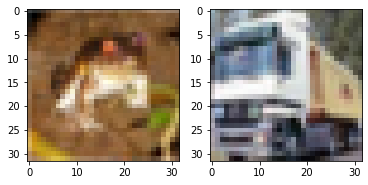

In [3]:
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)

In [4]:
def apply_mask(image, size=12, n_squares=1):
    h, w, channels = image.shape
    new_image = image
    for _ in range(n_squares):
        y = np.random.randint(h)
        x = np.random.randint(w)
        y1 = np.clip(y - size // 2, 0, h)
        y2 = np.clip(y + size // 2, 0, h)
        x1 = np.clip(x - size // 2, 0, w)
        x2 = np.clip(x + size // 2, 0, w)
        new_image[y1:y2,x1:x2,:] = 0
    return new_image

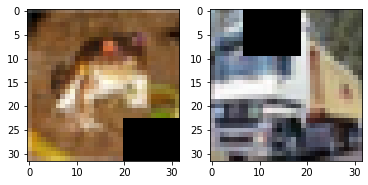

In [5]:
plt.subplot(1,2,1)
plt.imshow(apply_mask(image1))
plt.subplot(1,2,2)
plt.imshow(apply_mask(image2))

2. Using CIFAR10 datasest and Resnet-44 we will first apply simple data augmentation as in He et al.
(look at Section 4.2 of He et al.) and train the model with batch size 64. Note that testing is always
done with original images. Plot validation error vs number of training epochs.

Learning rate:  0.001
ResNet47v2
Not using data augmentation.


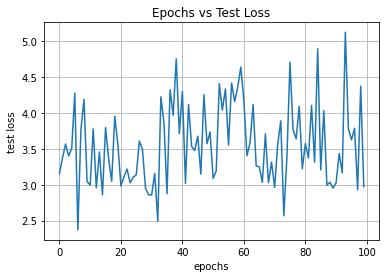

In [36]:
'''
Applied Cutout regularization after data normalization
'''

from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Training parameters
batch_size = 1000  # orig paper trained all networks with batch_size=128
epochs = 100
data_augmentation = False
num_classes = 10

# Subtracting pixel mean improves accuracy
subtract_pixel_mean = True
n=5

version = 2

# Computed depth from supplied model parameter n
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

#Cutout Regularization
for i in x_train:
  apply_mask(i,size=12,n_squares=1)
for i in x_test:
  apply_mask(i,size=12,n_squares=1)

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# If subtract pixel mean is enabled
if subtract_pixel_mean:
    x_train_mean = np.mean(x_train, axis=0)
    x_train -= x_train_mean
    x_test -= x_train_mean


# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)




def lr_schedule(epoch):
    """Learning Rate Schedule
    Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
    Called automatically every epoch as part of callbacks during training.
    # Arguments
        epoch (int): The number of epochs
    # Returns
        lr (float32): learning rate
    """
    lr = 1e-3
    if epoch > 180:
        lr *= 0.5e-3
    elif epoch > 160:
        lr *= 1e-3
    elif epoch > 120:
        lr *= 1e-2
    elif epoch > 80:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr


def resnet_block(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    """2D Convolution-Batch Normalization-Activation stack builder
    # Arguments
        inputs (tensor): input tensor from input image or previous layer
        num_filters (int): Conv2D number of filters
        kernel_size (int): Conv2D square kernel dimensions
        strides (int): Conv2D square stride dimensions
        activation (string): activation name
        batch_normalization (bool): whether to include batch normalization
        conv_first (bool): conv-bn-activation (True) or
            activation-bn-conv (False)
    # Returns
        x (tensor): tensor as input to the next layer
    """
    x = inputs
    if conv_first:
        x = Conv2D(num_filters,
                   kernel_size=kernel_size,
                   strides=strides,
                   padding='same',
                   kernel_initializer='he_normal',
                   kernel_regularizer=l2(1e-4))(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation:
            x = Activation(activation)(x)
        return x
    if batch_normalization:
        x = BatchNormalization()(x)
    if activation:
        x = Activation('relu')(x)
    x = Conv2D(num_filters,
               kernel_size=kernel_size,
               strides=strides,
               padding='same',
               kernel_initializer='he_normal',
               kernel_regularizer=l2(1e-4))(x)
    return x


def resnet_v1(input_shape, depth, num_classes=10):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    inputs = Input(shape=input_shape)
    num_filters = 16
    num_sub_blocks = int((depth - 2) / 6)

    x = resnet_block(inputs=inputs)
    # Instantiate convolutional base (stack of blocks).
    for i in range(3):
        for j in range(num_sub_blocks):
            strides = 1
            is_first_layer_but_not_first_block = j == 0 and i > 0
            if is_first_layer_but_not_first_block:
                strides = 2
            y = resnet_block(inputs=x,
                             num_filters=num_filters,
                             strides=strides)
            y = resnet_block(inputs=y,
                             num_filters=num_filters,
                             activation=None)
            if is_first_layer_but_not_first_block:
                x = resnet_block(inputs=x,
                                 num_filters=num_filters,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
        num_filters = 2 * num_filters

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    print(model.history())
    return model


def resnet_v2(input_shape, depth, num_classes=10):
    """ResNet Version 2 Model builder [b]
    Stacks of (1 x 1)-(3 x 3)-(1 x 1) BN-ReLU-Conv2D or also known as
    bottleneck layer
    First shortcut connection per layer is 1 x 1 Conv2D.
    Second and onwards shortcut connection is identity.
    Features maps sizes: 16(input), 64(1st sub_block), 128(2nd), 256(3rd)
    # Arguments
        input_shape (tensor): shape of input image tensor
        depth (int): number of core convolutional layers
        num_classes (int): number of classes (CIFAR10 has 10)
    # Returns
        model (Model): Keras model instance
    """
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    inputs = Input(shape=input_shape)
    num_filters_in = 16
    num_filters_out = 64
    filter_multiplier = 4
    num_sub_blocks = int((depth - 2) / 9)

    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_block(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate convolutional base (stack of blocks).
    activation = None
    batch_normalization = False
    for i in range(3):
        if i > 0:
            filter_multiplier = 2
        num_filters_out = num_filters_in * filter_multiplier

        for j in range(num_sub_blocks):
            strides = 1
            is_first_layer_but_not_first_block = j == 0 and i > 0
            if is_first_layer_but_not_first_block:
                strides = 2
            y = resnet_block(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            activation = 'relu'
            batch_normalization = True
            y = resnet_block(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_block(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if j == 0:
                x = resnet_block(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model


if version == 2:
    model = resnet_v2(input_shape=input_shape, depth=depth)
else:
    model = resnet_v1(input_shape=input_shape, depth=depth)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=lr_schedule(0)),
              metrics=['accuracy'])
print(model_type)

# Run training, with or without data augmentation.
if not data_augmentation:
    print('Not using data augmentation.')
    history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True, verbose = 0,
              )
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        # set input mean to 0 over the dataset
        featurewise_center=False,
        # set each sample mean to 0
        samplewise_center=False,
        # divide inputs by std of dataset
        featurewise_std_normalization=False,
        # divide each input by its std
        samplewise_std_normalization=False,
        # apply ZCA whitening
        zca_whitening=False,
        # randomly rotate images in the range (deg 0 to 180)
        rotation_range=0,
        # randomly shift images horizontally
        width_shift_range=0.1,
        # randomly shift images vertically
        height_shift_range=0.1,
        # randomly flip images
        horizontal_flip=True,
        # randomly flip images
        vertical_flip=False)

    # Compute quantities required for featurewise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    hist = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=0, workers=4,
                        callbacks=callbacks)
    

    
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=0)

#Plotting
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('test loss')
plt.title('Epochs vs Test Loss')
plt.grid()


3. Next use cutout for data augmentation in Resnet-44 as in Hoffer et al. and train the model and use
the same set-up in your experiments. Plot validation error vs number of epochs for different values of
M (2,4,8,16,32) where M is the number of instances generated from an input sample after applying
cutout M times effectively increasing the batch size to M*B, where B is the original batch size (before
applying cutout augmentation). You will obtain a figure similar to Figure 3(a) in the paper by Hoffer
et al. Also compare the number of epochs and wallclock time to reach 94% accuracy for different values
of M. Do not run any experiment for more than 100 epochs. If even after 100 epochs of training you
did not achieve 94% then just report the accuracy you obtain and the corresponding wallclock time to
train for 100 epochs. Before attempting this question it is advisable to read paper by Hoffer et al. and
especially Section 4.1.

# Question 5

1. Assume that total budget for number of hidden units we can have in the network is 512. Train a 1,
2, and 3 hidden layers feedforward neural network to learn the regression function. For each neural
network you can consider a different number of hidden units per hidden layer so that the total number
of hidden units does not exceed 512. We would recommend to work with 16, 32, 64, 128, 256, 512,
hidden units per layer. So if there is only one hidden layer you can have at most 512 units in that layer. If there are two hidden layers, you can have any combination of hidden units in each layer, e.g., 16 and
256, 64 and 128, etc. such that the total is less than 512. Plot the RMSE (Root Mean Square Error)
on test set for networks with different number of hidden layers as a function of total number of hidden
units. If there are more than one network with the same number of hidden units (say a two hidden
layer with 16 in first layer and 128 in second layer and another network with 128 in first layer and 16 in
second) you will use the average RMSE. So you will have a figure with three curves, one each for 1, 2,
and 3 layer networks, with x-axis being the total number of hidden units. Also plot another curve but
with the x-axis being the number of parameters (weights) that you need to learn in the network.

In [ ]:
import random

#Defining the function
def eggholder(x):
    return (-(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1]  + 47)))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1]  + 47)))))

X = []
y = []

#Evaluating eggholder function
for i in range(100000):
  x = np.array([random.uniform(-512,512),random.uniform(-512,512)])
  X.append(np.array([random.uniform(-512,512),random.uniform(-512,512)]))
  y.append(eggholder(x) + np.random.normal(0,0.3))

X = np.asarray(X)
y = np.asarray(y)

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
import time
import keras.backend as K

def rmse (y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

sgd = keras.optimizers.SGD(learning_rate = 0.00001,momentum=0.01, nesterov=True)

onelayer_rmse = []
twolayer_rmse = []
threelayer_rmse = []

num_params1 = []
num_params2 = []
num_params3 = []

time_1layer = []
time_2layer = []
time_3layer = []

units_total2 = [32,64,128,256,512]
units_total3 = [16,32,64,128,256]

#1 hidden layer
units1 = [32,64,128,256,512]

for i in units1:
  model1 = Sequential()
  model1.add(Dense(i, activation = 'relu', input_dim = 2))
  model1.add(Dense(units = 1))
  
  model1.compile(optimizer = sgd, loss = 'mse', metrics=[rmse])

  tic = time.time()
  one_layer = model1.fit(X_train, y_train, batch_size = 1000, epochs = 2000, validation_data=(X_test,y_test),shuffle=True,verbose=0)
  toc = time.time()

  num_params1.append(model1.count_params())
  onelayer_rmse.append(one_layer.history['val_rmse'][-1])
  time_1layer.append(toc-tic)



#2 hidden layers
units2 = [16,32,64,128,256]

for i in units2:
  model2 = Sequential()
  model2.add(Dense(i, activation = 'relu', input_dim = 2))
  model2.add(BatchNormalization())
  model2.add(Dense(i, activation = 'relu'))
  model2.add(BatchNormalization())
  model2.add(Dense(units = 1))

  model2.compile(optimizer = sgd,loss = 'mse', metrics=[rmse])

  tic = time.time()
  two_layer = model2.fit(X_train, y_train, batch_size = 1000, epochs = 2000, validation_data=(X_test,y_test),shuffle=True,verbose=0)
  toc = time.time()

  num_params2.append(model2.count_params())
  twolayer_rmse.append(two_layer.history['val_rmse'][-1])
  time_2layer.append(toc-tic)



#3 hidden layers
units3 = [8,16,32,64,128]

for i in units3: 
  model3 = Sequential()
  model3.add(Dense(i, activation = 'relu', input_dim = 2))
  model3.add(BatchNormalization())
  model3.add(Dense(i, activation = 'relu'))
  model3.add(BatchNormalization())
  model3.add(Dense(i, activation = 'relu'))
  model3.add(BatchNormalization())
  model3.add(Dense(units = 1))

  model3.compile(optimizer = sgd, loss = 'mse', metrics=[rmse])

  tic = time.time()
  three_layer = model3.fit(X_train, y_train, batch_size = 1000, epochs = 2000, validation_data=(X_test,y_test),shuffle=True,verbose=0)
  toc = time.time()

  num_params3.append(model3.count_params())
  threelayer_rmse.append(three_layer.history['val_rmse'][-1])
  time_3layer.append(toc-tic)


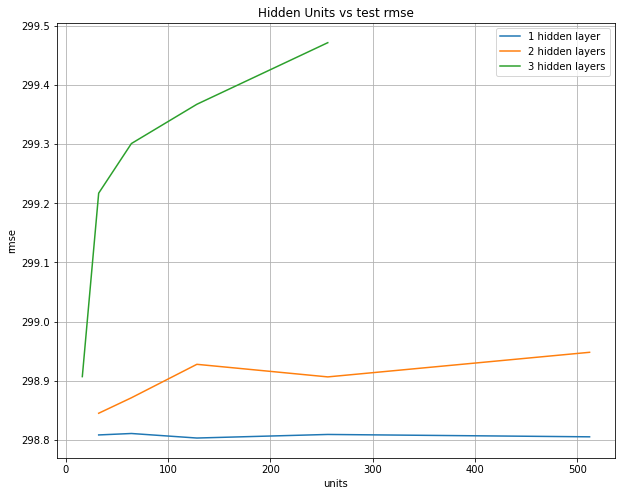

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(units1,onelayer_rmse,label='1 hidden layer')
plt.plot(units_total2,twolayer_rmse,label='2 hidden layers')
plt.plot(units_total3,threelayer_rmse,label='3 hidden layers')
plt.title('Hidden Units vs test rmse')
plt.ylabel('rmse')
plt.xlabel('units')
plt.legend()
plt.grid()
plt.show()

2. Comment on the tradeoff between number of parameters and RMSE as you go from deeper (3 hidden
layers) to shallow networks (1 hidden layer). Also measure the wall clock time for training each configuration and plot training time vs number of parameters. Do you see a similar tradeoff in training time
?

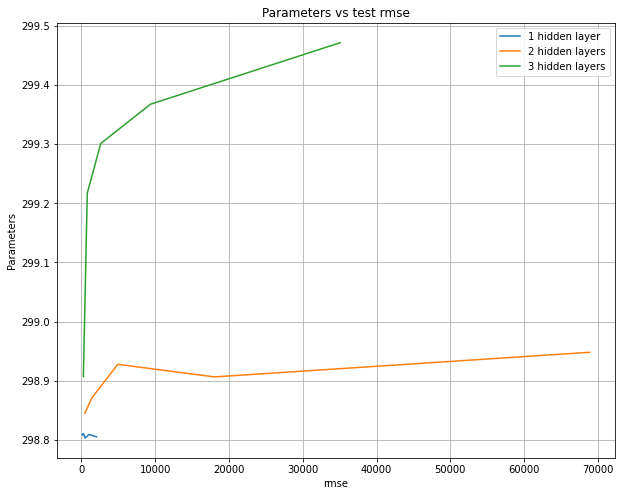

In [ ]:
#Plotting
fig = plt.figure(figsize=(10,8))
plt.plot(num_params1, onelayer_rmse,label='1 hidden layer')
plt.plot(num_params2, twolayer_rmse,label='2 hidden layers')
plt.plot(num_params3, threelayer_rmse,label='3 hidden layers')
plt.title('Parameters vs test rmse')
plt.ylabel('Parameters')
plt.xlabel('rmse')
plt.legend()
plt.grid()
plt.show()

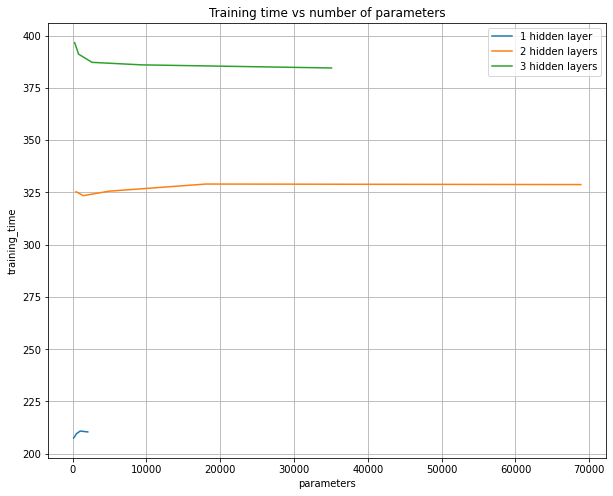

In [ ]:
fig = plt.figure(figsize=(10,8))
plt.plot(num_params1, time_1layer,  label='1 hidden layer')
plt.plot(num_params2, time_2layer, label='2 hidden layers')
plt.plot(num_params3 ,time_3layer,  label='3 hidden layers')
plt.title('Training time vs number of parameters')
plt.ylabel('training_time')
plt.xlabel('parameters')
plt.legend()
plt.grid()
plt.show()